In [88]:
import os
from dotenv import load_dotenv
load_dotenv(override=True)
import pprint
import base64
from google import genai
from google.genai import types
from google.genai.types import GenerateContentConfig

# importing Image module from PIL package  
from PIL import Image
from IPython.display import display, Markdown, Latex
import json

## Setup

In [89]:
client = genai.Client(
    vertexai=True,
    project=os.getenv("PROJECT_ID"), 
    location=os.getenv("LOCATION")
)

SCENARIO_TITLE = "murder_in_the_alps_express"

State = dict()

State["initial_context"] = """
  The Alps express is leaving Annecy, heading to the most prestigious ski resorts of the Alps. Within it, a group of 7 people are meeting each other for a bachelor party. 
  Some of them do know each other from a long time, some other don't.
  What happened later that night is horrible, one of the waitress, a beautifull woman, is found dead in her bathroom.
  Among the 7 suspects, one is definietly the killer, it is now up to them to determine who this is.
"""

SUSPECTS = "7 suspects, only yound mens in their early 30s"

In [90]:
generate_content_config_json = types.GenerateContentConfig(
    temperature = 0.5,
    top_p = 0.95,
    max_output_tokens = 8192,
    response_modalities = ["TEXT"],
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    )],
    response_mime_type = "application/json",
  )

generate_content_config_txt = types.GenerateContentConfig(
    temperature = 0.5,
    top_p = 0.95,
    max_output_tokens = 8192,
    response_modalities = ["TEXT"],
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    )]
  )


## Storyline

In [91]:
prompt_context = """
You are an expert mystery writer assistant, skilled in creating engaging murder mysteries. 
Your task is to generate the setup for a murder mystery in JSON format. 
The output should include the following keys, respecting the defined JSON schema:

- "context": String (describes a detailed setting and tone of the mystery)
- "victim": object containing:
  - "name": String
  - "description": String (physical description, general info, personality and short history)
  - "occupation": String (what they did for a living, if relevant)
- "location": An object containing:
  - "name": String (e.g., "Blackwood Manor", "Stardust Research Station", "Seabreeze Inn")
  - "description": String (detailed description of the location)
- "motive": String (a potential reason for wanting the victim dead, usually something deep that would create a twist in the storyline)
- "murder_method": String (how the victim was killed)
- "initial_clues": An array of strings (a few starting clues found at the scene)
- "time_of_death": String (an estimated time of death).

Please ensure the output is a valid JSON object, without any leading or trailing text. 
Generate the data using the following context {initial_context}

"""

In [92]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_context.format(initial_context = State["initial_context"]),
    config=generate_content_config_json
)

State["murder_context"] = json.loads(response.text)
State["victim_name"] = State["murder_context"]["victim"]["name"]

c:\Users\User\gemini-examples\.venv\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [93]:
pprint.pprint(State["murder_context"])

{'context': 'The luxurious Alps Express train, departing from Annecy, is en '
            'route to the famed ski resorts of the Alps. A bachelor party of '
            'seven individuals, a mix of old friends and new acquaintances, is '
            'underway. Amidst the revelry, tragedy strikes: a beautiful '
            'waitress is found dead in her private bathroom, turning the '
            'celebratory atmosphere into one of suspicion and fear. One of the '
            "seven passengers is the killer, and it's up to them to uncover "
            'the truth.',
 'initial_clues': ['A silk scarf, not belonging to the victim, was found '
                   'tightly wrapped around her neck.',
                   'A small, ornate button was discovered on the floor near '
                   "the victim's body.",
                   'A faint scent of expensive cologne lingers in the '
                   'bathroom.'],
 'location': {'description': 'The train is a marvel of modern engineering,

### Characters

In [94]:
prompt_characters = """
You are an expert locked room, mystery murder writer, adept at crafting compelling characters for murder mysteries. Building upon the context of a locked-room mystery on a train, you must generate detailed profiles for additional potential suspects. Your task is to provide the output as a JSON array, where each object in the array represents a suspect. Respect the following JSON schema:

- "suspects": An array of objects, where each object contains:
    - "name": String
    - "description": String (detailed physical description, personality traits, background information relevant to the mystery, and any quirks or habits)
    - "relationship_to_victim": String (a detailed description of their connection to the victim - family, friend, acquaintance, enemy, employee, etc.)
    - "motive": String (a plausible reason why they might want the victim dead, this could be kept vague and be related to their relationship with the victim)
    - "alibi": String (a description of their whereabouts around the estimated time of the victim's death, this can also be vague)
    - "character_constraint": String (a personal constraint for each character, that would explain why they can't say all the truth. This could be something like, "protecting a family secret" or "hiding a specific object in the house".)
    - "character_secret" String(a specific, deeply hidden secret, shared or not with another character, but that could make this character seen as a motive for the murder if it was about to be exposed)
    - "implication" String (killer or accomplice or innocent, there must be only one murderer, and one accomplice)

The context of the murder is the following: {murder_context}

The suspects names must contain the following: Quentin, Bastien, Cyril, Maxime, Antoine, Robin and Gabriel

Ensure your output is a valid JSON array, and without any leading or trailing text, and contains exactly {number_of_suspect} suspects.

"""

In [95]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_characters.format(number_of_suspect=SUSPECTS, murder_context=State["murder_context"]),
    config=generate_content_config_json
)

State["characters"] = json.loads(response.text)


In [96]:
pprint.pprint(State["characters"])
murderer_name = [character["name"] for character in State["characters"] if character["implication"].lower()=='killer']
assert len(murderer_name)==1, "Oops, there are more than one murderer"

[{'alibi': 'He claims to have been in the bar car, having a quiet drink, but '
           'cannot provide any witnesses.',
  'character_constraint': 'He is protecting a family secret that would ruin '
                          'his reputation if revealed.',
  'character_secret': "He secretly funded Elodie's dream of opening a pastry "
                      'shop, but was furious when she started to spend the '
                      'money on other things.',
  'description': 'Quentin, in his early 30s, is a tall, athletic man with a '
                 'perpetually serious demeanor. He has short-cropped dark hair '
                 'and intense brown eyes. He is known for his meticulous '
                 "nature and preference for order. He's a successful lawyer, "
                 'always dressed impeccably, but can be quite reserved and '
                 'struggles to express his emotions, often appearing cold. He '
                 'has a habit of adjusting his tie when nervous.',
 

In [97]:
for character in State["characters"]:
    print(character["name"])

Quentin Dubois
Bastien Lemaire
Cyril Moreau
Maxime Dubois
Antoine Lefevre
Robin Clement
Gabriel Marchand


### Scenario

In [100]:
scenario_schema = """ 

{
  "scenario_title": "Title of your scenario",
  "murder": {
    "method": "Explain how the murder was committed. This should be a subtle method, not immediately obvious, and should have a clear connection to the environment or a character's actions. It should be able to look like a natural death or an accident at first glance.",
    "timing": "Specify when the murder took place, outlining the specific window of opportunity the killer exploited. This timing should have a clear relationship with the timeline of events leading up to the discovery.",
    "victims_state_before": "Describe the victim's state just before the murder.",
    "victims_state_after": "Describe the victim's state after the death is discovered."

  },
  "killer": {
    "identity": "Clearly state who the killer is.",
    "motive": "Explain the killer's motive, making it nuanced and perhaps not immediately apparent. What makes them willing to commit the crime?",
    "concealment": "How does the killer conceal their involvement? What specific actions do they take to mislead others and establish a false narrative? Include specific strategies or tricks."
  },
  "misdirection": {
    "false_leads": "Detail how the killer manipulates the scene or others to point suspicion towards other characters.",
    "innocent_suspects": "Outline how the setup or timeline makes other characters look suspicious and why they look suspicious.",
    "character_interactions": "Explain how specific character interactions, either pre-planned or spontaneous, contribute to mislead. How do they naturally feed into the red herrings and misleading the investigation?",
  },
  "clues": {
    "solver": "Explain the main and hidden way to find the real killer, among all the red herrings"
    "character_interactions": "Explain how specific character player interactions or collaborations can contribute to finding subtle clues. How do they naturally make progress to the investigation?",
    "clue_placement": "How do clues either lead to the real killer, or contribute to the mislead of the other characters?",
    "subtle_guidance": "How should the different characters interact with clues and red herrings to gradually lead to the truth? How can you make the real killer's behaviour seem normal without making them appear too innocent?"
  },
  "scenario_flow": {
     "key_steps": "Outline the main steps of the scenario, from the lead-up to the murder to the investigation phase. List the key moments that will drive the characters interactions.",
     "timeline_impact": "How does the murder methodology affect the overall timeline of events, creating specific opportunities or alibis for other suspects?",
     "investigation_focus": "How is the investigation shaped? What kind of evidence can they find and how can they misinterpret it?"
  }
}
"""

prompt_scenario = """ 

I need a comprehensive scenario outline for a locked-room mystery, and the output must be in JSON format. The JSON should contain the following keys, with values adhering to the instructions below:

{scenario_schema}

The context of the story is the following {murder_context}

The characters (including the killer) are {characters}
"""

In [101]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_scenario.format(
        murder_context = State["murder_context"],
        characters = State["characters"],
        scenario_schema=scenario_schema
    ),
    config=generate_content_config_json
)

State["scenario"] = json.loads(response.text)


In [102]:
pprint.pprint(State["scenario"])

{'clues': {'character_interactions': 'Specific character interactions can '
                                     'contribute to finding subtle clues. For '
                                     'example, if Cyril and Bastien '
                                     'collaborate, they may discover the '
                                     "connection between Bastien's missing pen "
                                     "and the ink stain on Robin's notebook. "
                                     'If Quentin and Maxime discuss Elodie, '
                                     'they might realize that the button found '
                                     'at the scene is similar to those on a '
                                     'jacket that Robin was seen wearing. If '
                                     'Antoine and Gabriel compare notes, they '
                                     "might notice that Gabriel's cologne is "
                                     'not as strong as it was on

### Clues

In [103]:
clue_schema=""" 
  {
    "clue_type": "String (e.g., 'Physical', 'Circumstantial', 'Testimonial', 'Digital', 'Hidden')",
    "description": "String (a detailed description of the clue and what it might reveal)",
    "location": "String (where the clue is found in the story and timeline, be as specific as possible)",
    "characters_involved": ["array", "of", "character", "names", "related", "to", "the", "clue"],
    "relevance_to_murderer": "String (a very short note of how this clue is relevant to the real murderer, and will lead to his culpability)"
  }

"""

prompt_clues = """

You are an expert locked room murder writer, skilled at creating compelling clues and weaving them into a narrative. 
Your task is to generate a series of clues for the murder mystery from an existing scenario. 
The clues should be diverse (physical, circumstantial, testimonial, digital, hidden, subtle or not) and logically placed within the context of the story. 
The clues will depend on the provided scenario
The output should be a JSON array of clue objects, each with the following structure:

{clue_schema}

The context is {murder_context}

The characters are {characters}

The provided scenario is {scenario}

Your task is to generate at least 5 clues. These should be:
  *   Placed within the story logically (consider locations, character movements, and timeline)
  *   Make the clues subtle enough, without leading to a direct an too evident implication of the killer, but enough to give a direction or to eliminate suspects
  *   Include a mix of physical, circumstantial, testimonial, digital, and hidden clues.
  *   Initially create misdirection or suspicion on specific characters, but ultimately point to the real murderer.
  *   Use the clues to explain how the murderer was able to kill {victim_name}, and what was their motive.
Ensure that the output is a valid JSON array of clue objects, without any leading or trailing text.
"""

In [104]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_clues.format(
        victim_name = State["victim_name"],
        murder_context = State["murder_context"],
        characters=State["characters"],
        scenario = State["scenario"],
        clue_schema=clue_schema
    ),
    config=generate_content_config_json
)

State["clues"] = json.loads(response.text)


In [105]:
pprint.pprint(State["clues"])

[{'characters_involved': ['Elodie Dubois'],
  'clue_type': 'Physical',
  'description': "A small, ornate button, different from those on the victim's "
                 "uniform, is found on the floor near the victim's body. It "
                 'has a unique design, possibly from a high-end garment.',
  'location': "On the floor, next to the victim's body, in her private "
              'bathroom.',
  'relevance_to_murderer': 'This button is a red herring, not belonging to the '
                           'killer. It is meant to mislead the investigation '
                           'towards other suspects. However, it is similar to '
                           'the ones on a jacket that Robin was seen wearing, '
                           'which can be used to confirm his presence near the '
                           'crime scene.'},
 {'characters_involved': ['Elodie Dubois', 'Gabriel Marchand'],
  'clue_type': 'Circumstantial',
  'description': 'A faint scent of expensive cologne 

### Timeline

In [106]:

timeline_schema = """
{
  "timeline": [
    {
      "time": "String (e.g., '10:00 PM')",
      "event": "String (a detailed description of what happened at this time, including which characters are involved)",
      "location": "String (the location of the event)",
     "characters_involved": ["array", "of", "character", "names"],
     "characters_witnessed" ["array", "of", "character", "names", "or", "None"],
    },
    ...
   ]
}
"""

prompt_timeline= """

You are an expert mystery writer assistant, skilled at weaving intricate timelines. 
Your task is to generate a detailed and chronological timeline of events leading up to the murder of {victim_name}. 
This timeline should reveal the true sequence of events, including the interactions between the victim, the murderer, and other suspects, taking into account their established relationships and alibis. 
The timeline must also clearly indicate the precise time the murder occurred. The output should be a JSON object, containing a single key "timeline" which should have an array of objects, where each object represents a time event, respecting the defined schema:

The output should follow the following structure:
{timeline_schema}

Context: {murder_context}

Scenario: {scenario}

Characters: {characters}

Clues: {clues}

The timeline must reveal the actual murderer and include the events that led to the crime, while using the other suspects to generate a sense of misdirection. 
Ensure that the output is a valid JSON object with a "timeline" array of event objects, without any leading or trailing text. 
Make sure that you include the moment when the victim was discovered.

"""

prompt_red_herring_timeline = """

You are an expert mystery writer assistant, particularly skilled at creating red herrings and misdirection. 
Your task is to generate a series of events  designed specifically to mislead investigators and create suspicion around innocent characters. 
These events should be integrated into the existing timeline, but do not need to be in chronological order, and can be included between the established time slots. 
The output should be a JSON array of event objects, each with the following structure:

{timeline_schema}

Context: {murder_context}

Existing timeline: {timeline}

Scenario: {scenario}

characters: {characters}

clues: {clues}

Introduce "Hidden" Clues and Conflicting Information:

Focus on creating events that:
    *   Omitted Details: Deliberately leave out some details, or contradict characters slightly. For example, one might say something but another character's statement could say a bit differently.
    *   Include seemingly suspicious but ultimately irrelevant actions
    *   Conflicting Times: Have slight discrepancies in reported times
    *   Exploit existing character traits or relationships.
    *   Vague Statements: Use phrasing like "I thought I saw..." or "It seemed to me that...", to suggest uncertainty.
    *   Don't directly conflict with the core timeline of the actual murder but can cause doubt.
Generate at least 5 such misleading events. Ensure that the output is a valid JSON array of event objects, without any leading or trailing text.

"""




In [107]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_timeline.format(
        victim_name = State["victim_name"],
        murder_context = State["murder_context"],
        characters = State["characters"],
        scenario=State["scenario"],
        clues=State["clues"],
        timeline_schema=timeline_schema
    ),
    config=generate_content_config_json
)

State["timeline"] = json.loads(response.text)


In [108]:
pprint.pprint(State["timeline"])

{'timeline': [{'characters_involved': ['Quentin Dubois',
                                       'Bastien Lemaire',
                                       'Cyril Moreau',
                                       'Maxime Dubois',
                                       'Antoine Lefevre',
                                       'Robin Clement',
                                       'Gabriel Marchand',
                                       'Elodie Dubois'],
               'characters_witnessed': ['None'],
               'event': 'The bachelor party begins in the bar car. The seven '
                        'guests are introduced and start drinking, while '
                        'Elodie serves them.',
               'location': 'Bar car',
               'time': '8:00 PM'},
              {'characters_involved': ['Antoine Lefevre', 'Elodie Dubois'],
               'characters_witnessed': ['Maxime Dubois', 'Robin Clement'],
               'event': 'Antoine and Elodie have a drunken argument. E

In [109]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_red_herring_timeline.format(
        victim_name = State["victim_name"],
        murder_context = State["murder_context"],
        timeline = State["timeline"],
        scenario = State["scenario"],
        clues = State["clues"],
        characters=State["characters"],
        timeline_schema=timeline_schema
    ),
    config=generate_content_config_json
)

State["red_herrings"] = json.loads(response.text)

In [110]:
pprint.pprint(State["red_herrings"])

[{'timeline': [{'characters_involved': ['Cyril Moreau'],
                'characters_witnessed': ['Bastien Lemaire'],
                'event': 'Cyril is seen pacing back and forth outside of '
                         "Elodie's cabin, looking agitated. He appears to be "
                         "muttering to himself, but it's difficult to make out "
                         "what he's saying.",
                'location': 'Corridor near the staff area',
                'time': '10:15 PM'}]},
 {'timeline': [{'characters_involved': ['Maxime Dubois'],
                'characters_witnessed': ['Quentin Dubois'],
                'event': 'Maxime is seen leaving the bar car and heading '
                         'towards the staff area. He seems to be in a hurry '
                         'and looks slightly disheveled. He is seen adjusting '
                         'his tie as he walks.',
                'location': 'Corridor near the staff area',
                'time': '10:45 PM'}]},
 {'

### Story introduction

In [111]:
prompt_introduction = """ 
Generate a short introductory markdown paragraph for a murder mystery game. 
The context is: {murder_context}

The victim is: {victim_name}

The suspects are: {characters} 

The introduction should:

*   Establish the setting and atmosphere using descriptive language.
*   Mention the victim and the circumstances of their discovery.
*   Mention what was observed when we discovered the victim.
*   Avoid any direct or implied accusations towards any potential suspects, or any clue.
*   Create a sense of intrigue and mystery.
*   Be concise (no more than 10 sentences).
*   Use Markdown formatting for basic text styling (e.g., **bold**, *italics*, etc.).

**Specific Instructions:**

*   Focus on atmosphere and setting the scene.
*   Maintain a neutral tone regarding the cause of death and the suspects.
*   Do not introduce character motivations, focus on scene only.
*   Use Markdown for emphasis where appropriate.

"""

prompt_introduction_translate = """ 
Translate the following text in french, don't add any leading or trailing text:

text to translate {introduction}

"""

In [112]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_introduction.format(
        victim_name = State["victim_name"],
        murder_context = State["murder_context"],
        characters=State["characters"],

    ),
    config=generate_content_config_txt
)

State["introduction"] = response.text


response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_introduction_translate.format(
        introduction = State["introduction"],

    ),
    config=generate_content_config_txt
)

State["introduction_fr"] = response.text

In [113]:
display(Markdown(State["introduction_fr"]))

Le luxueux train **Alps Express** glisse à travers le paysage enneigé, un phare de chaleur et de liesse contrastant avec le froid décor montagneux. Un enterrement de vie de garçon bat son plein, des rires et des tintements de verres résonnant à travers les wagons opulents. Cependant, l'atmosphère festive est brisée lorsqu'une jeune serveuse, *Élodie Dubois*, est retrouvée sans vie dans sa salle de bain privée. La porte était verrouillée, et la découverte a été faite après une période de silence. Un foulard de soie, qui n'était pas le sien, a été trouvé serré autour de son cou. Un petit bouton orné gisait sur le sol à proximité, et un léger parfum de cologne coûteuse persistait dans l'air. L'ambiance festive a viré à la suspicion et à la peur lorsque les passagers réalisent qu'un tueur se trouve parmi eux. Le voyage vers les stations de ski est devenu une chasse au meurtrier.


### Police report

In [114]:
police_report_schema = """  
[
    {
        "type": "testimony",
        "description": "I saw someone near the library around midnight, seemed to be in a hurry, but I can't say for sure who this was, all I know is that he was wearing glasses.",
        "context": "Testimony of the house caretaker, Robert."
    },
    {
        "type": "object",
        "description": "A single glove, made of black leather, was found under the victim's desk.",
        "context": "Found in the library."
    },
 {
        "type": "forensic",
        "description": "Traces of an unusual and rare poison was found in the victim's wine glass, this poison comes from south affrica",
         "context": "Lab Analysis."
    },
     {
        "type": "testimony",
        "description": "I thought I heard someone turning pages in the library late at night, I heard him going to bed 10 minutes later.",
        "context": "Testimony of a maid, Emily."
    },
   {
        "type": "image",
        "description": "Photograph of a book on the floor, taken in the library near a bookshelf. The book is open at a specific page with a hand written note.",
        "context": "Scene photos taken by police",
        "source": "library_book.jpg"
    },
    {
        "type":"letter",
        "description": "A package delivery ticket from africa was found inside Mr. Blackwood's luggage",
        "context": "Item seized by the police",
        "source": "blackwood_letter.txt"
    }
]

"""


prompt_police_report =""" 

Generate a JSON formatted police report for a murder investigation the day after a locked-room murder mystery party. 
The context is: {murder_context}

The victim is: {victim_name}

The suspects are: {characters} 

The scenario is: {scenario}

The clues are: {clues}

The red herrings are: {red_herrings}

Generate a JSON formatted output containing subtle evidences and testimonies for in order to slightly help the investigation. 

The JSON should contain an array of objects. Each object should represent a piece of evidence or a witness testimony and have the following keys:

*   `type`: A string indicating the type of evidence ("testimony", "image", "letter", "object", "forensic").
*   `description`: A string providing a detailed description of the subtle evidence or red herring 
*   `context`: A string offering additional contextual information. This could include where the evidence was found, who gave the testimony, etc.
*   `source` : Optional string, provide a filename if type is an image, or a document title if a letter.

**Important Instructions:**

*   **testimonies are not incriminating names**
*   **Subtlety is key.** The evidences should be very sublte, they should help the players to find clues or eliminates the red herrings.
*   **Focus on details.** Emphasize minute details or contradictions in descriptions.
*   **Avoid direct accusations.** Don't create evidences that directly incriminates any suspect in the testimonies.
*   **Clue Focus:** Emphasize clues related to [Specify 2-3 specific pieces of the killer's method or alibi or key items]. This will help ensure the clues are relevant.
*   **Example:** Use examples of subtly to write the clues. Eg : "A used glass of red wine was found next to the victim's body.", "A single glove is found inside the victim's room, but not near the body"
*   Include at least 1 testimonies and at least 3 pieces of other evidence.

**JSON Example:**
{police_report_schema}


"""

prompt_json_translate_fr = """

Translate the following dictionnary in french, keep in as a JSON format without addin leading or trailing text:

Dictionnary to translate : {content}

"""

In [115]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_police_report.format(
        victim_name = State["victim_name"],
        murder_context = State["murder_context"],
        scenario = State["scenario"],
        clues = State["clues"],
        red_herrings = State["red_herrings"],
        characters=State["characters"],
        police_report_schema=police_report_schema
    ),
    config=generate_content_config_json
)

State["police_report"] = json.loads(response.text)

response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_json_translate_fr.format(
        content = State["police_report"]
    ),
    config=generate_content_config_json
)

State["police_report_fr"] = json.loads(response.text)



In [116]:
pprint.pprint(State["police_report_fr"])

[{'context': "Témoignage d'un membre du personnel du train, lors de l'enquête "
             'initiale sur les lieux.',
  'description': "J'ai remarqué que l'écharpe autour du cou de la victime "
                 'semblait un peu trop bien placée, presque comme si elle '
                 'avait été arrangée au lieu de simplement tomber ainsi.',
  'type': 'témoignage'},
 {'context': "Trouvé dans la cabine de Robin Clement, lors d'une fouille des "
             'effets personnels des passagers.',
  'description': "Une petite tache d'encre, presque imperceptible, est visible "
                 "sur le bord d'une page d'un cahier trouvé dans l'une des "
                 "cabines de passagers. L'encre semble être d'une teinte de "
                 'bleu distincte.',
  'type': 'objet'},
 {'context': 'Analyse médico-légale de la poignée de la porte de la salle de '
             'bain.',
  'description': "Une trace légère, presque indétectable, d'un type spécifique "
                 "d'eau de

In [117]:
for element in State["police_report_fr"]:
    print(element)

    try:
        response1 = client.models.generate_image(
        model='imagen-3.0-generate-001',
        prompt="realistic, safe, murder mystery game" + element["description"],
        config=types.GenerateImageConfig(
            negative_prompt= "NSFW",
            number_of_images= 1,
            include_rai_reason= True,
            output_mime_type= "image/jpeg",
            include_safety_attributes=False,
            safety_filter_level="BLOCK_NONE"
            )
        )
        image_bytes = response1.generated_images[0].image.image_bytes
        # response1.generated_images[0].image.show()
        
    except:
        image_bytes = None

    
    element.update({"image_bytes": image_bytes})


{'type': 'témoignage', 'description': "J'ai remarqué que l'écharpe autour du cou de la victime semblait un peu trop bien placée, presque comme si elle avait été arrangée au lieu de simplement tomber ainsi.", 'context': "Témoignage d'un membre du personnel du train, lors de l'enquête initiale sur les lieux."}
{'type': 'objet', 'description': "Une petite tache d'encre, presque imperceptible, est visible sur le bord d'une page d'un cahier trouvé dans l'une des cabines de passagers. L'encre semble être d'une teinte de bleu distincte.", 'context': "Trouvé dans la cabine de Robin Clement, lors d'une fouille des effets personnels des passagers."}
{'type': 'objet', 'description': "Une trace légère, presque indétectable, d'un type spécifique d'eau de Cologne a été détectée sur la poignée de la porte de la salle de bain de la victime. L'odeur n'est pas aussi forte que l'on pourrait s'y attendre si quelqu'un s'y était trouvé récemment.", 'context': 'Analyse médico-légale de la poignée de la porte

In [118]:
import base64
from typing import List, Dict
import os


def create_evidence_markdown(evidence_list: List[Dict], output_dir: str = SCENARIO_TITLE) -> None:
    """
    Generates a markdown file from a list of evidence/testimony dictionaries, including images.

    Args:
        evidence_list: A list of dictionaries, each containing evidence details.
        output_filename: The filename of the markdown file to be created. Defaults to "evidence_report.md".
    """
    # 1. Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    with open(f"{output_dir}/evidence_report.md", "w", encoding="utf-8") as md_file:
        md_file.write("# Evidence and Testimonies Report\n\n")

        for item in evidence_list:
            item_type = item.get("type", "Unknown")
            description = item.get("description", "No description provided")
            context = item.get("context", "No context provided")
            image_bytes = item.get("image_bytes")
            source = item.get("source", None)


            md_file.write(f"## {item_type.capitalize()}\n\n")

            if source:
                 md_file.write(f"**Source:** {source}\n\n")

            if image_bytes:
                try:
                    image_base64 = base64.b64encode(image_bytes).decode("utf-8")
                    md_file.write(f'<img src="data:image/jpeg;base64,{image_base64}" width="200" alt="Evidence Image">\n\n')
                except Exception as e:
                     md_file.write(f"**Error displaying image**: {e}\n\n")


            md_file.write(f"**Description:** {description}\n\n")
            md_file.write(f"**Context:** {context}\n\n")
            md_file.write("---\n\n")  # Separator between entries

    print(f"Markdown file created: {output_dir}/evidence_report.md")

In [119]:
create_evidence_markdown(State["police_report_fr"])

Markdown file created: murder_in_the_alps_express/evidence_report.md


### Characters images

In [120]:
response = client.models.generate_content(
    model=os.getenv("MODEL"),
    contents=prompt_json_translate_fr.format(
        content=State["characters"],
    ),
    config=generate_content_config_json
)

State["characters_fr"] = json.loads(response.text)



In [121]:
State["character_presentation"] = []

for character in State["characters_fr"]:

    print(character["name"])
    print(character["description"])  

    # Generate Image
    response1 = client.models.generate_image(
        model='imagen-3.0-generate-001',
        prompt="safe, realistic, portrait" + character["description"],
        config=types.GenerateImageConfig(
            negative_prompt= "NSFW",
            number_of_images= 1,
            include_rai_reason= True,
            output_mime_type= "image/jpeg",
            include_safety_attributes=False,
            safety_filter_level="BLOCK_NONE"
        )
    )

    State["character_presentation"].append({
        "name": character["name"],
        "description": character["description"],
        "image_bytes": response1.generated_images[0].image.image_bytes
    })


Quentin Dubois
Quentin, au début de la trentaine, est un homme grand et athlétique avec une attitude perpétuellement sérieuse. Il a les cheveux courts et foncés et des yeux marron intenses. Il est connu pour sa nature méticuleuse et sa préférence pour l'ordre. C'est un avocat prospère, toujours habillé impeccablement, mais il peut être assez réservé et a du mal à exprimer ses émotions, apparaissant souvent froid. Il a l'habitude d'ajuster sa cravate lorsqu'il est nerveux.
Bastien Lemaire
Bastien est un homme charismatique au début de la trentaine, avec un sourire charmant et un don pour raconter des histoires. Il a un look légèrement ébouriffé, avec des cheveux bruns bouclés et une barbe de quelques jours. C'est un journaliste indépendant, connu pour son esprit aventureux et son amour des bonnes fêtes. Il tripote souvent son stylo lorsqu'il est plongé dans ses pensées.
Cyril Moreau
Cyril est un homme calme et observateur au début de la trentaine, avec une corpulence mince et une expres

In [122]:
import base64
from typing import List, Dict

def create_character_table(characters: List[Dict]) -> str:
    """
    Generates a markdown table of characters, including name, description, and thumbnail.

    Args:
        characters: A list of dictionaries, each containing character details. Each dict should contain keys 'name', 'description' and 'image_bytes'

    Returns:
        A string containing the markdown table.
    """
    header = "| Thumbnail | Name | Description |\n"
    separator = "|---|---|---|\n"
    rows = []

    for char in characters:
        name = char.get('name', 'N/A')
        description = char.get('description', 'N/A')
        image_bytes = char.get('image_bytes')

        if image_bytes:
            image_base64 = base64.b64encode(image_bytes).decode('utf-8')
            thumbnail = f'<img src="data:image/jpeg;base64,{image_base64}" width="70" height="70">'
        else:
            thumbnail = 'N/A'

        row = f"| {thumbnail} | {name} | {description} |\n"
        rows.append(row)

    return header + separator + "".join(rows)

| Thumbnail | Name | Description |
|---|---|---|
| 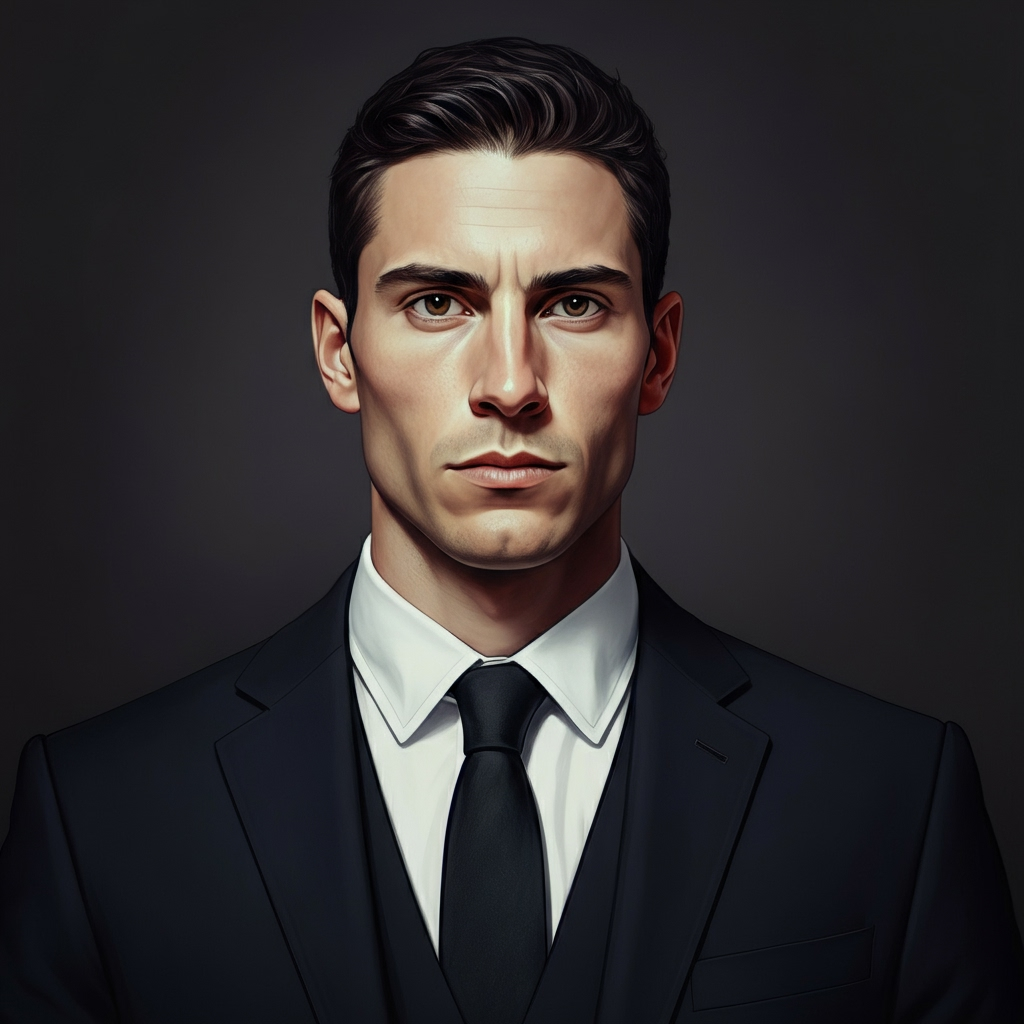 | Quentin Dubois | Quentin, au début de la trentaine, est un homme grand et athlétique avec une attitude perpétuellement sérieuse. Il a les cheveux courts et foncés et des yeux marron intenses. Il est connu pour sa nature méticuleuse et sa préférence pour l'ordre. C'est un avocat prospère, toujours habillé impeccablement, mais il peut être assez réservé et a du mal à exprimer ses émotions, apparaissant souvent froid. Il a l'habitude d'ajuster sa cravate lorsqu'il est nerveux. |
| 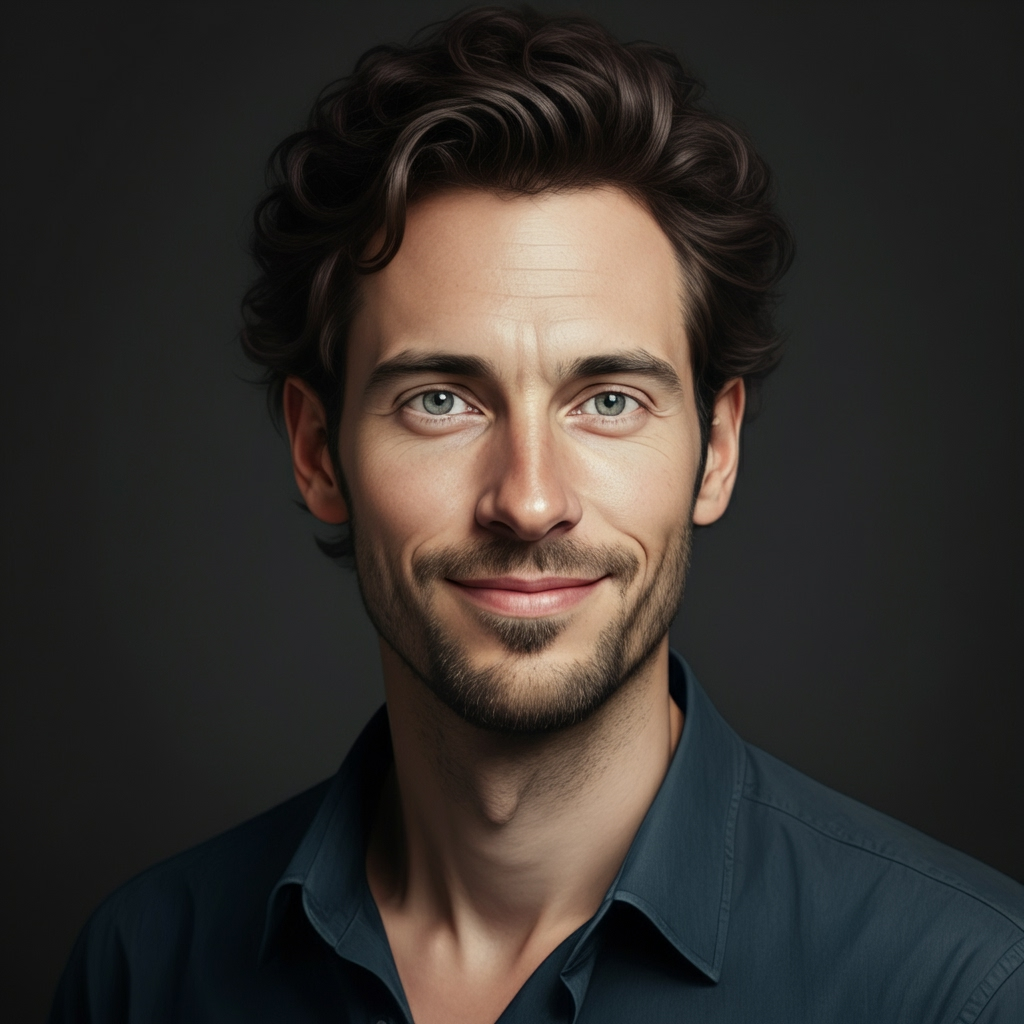 | Bastien Lemaire | Bastien est un homme charismatique au début de la trentaine, avec un sourire charmant et un don pour raconter des histoires. Il a un look légèrement ébouriffé, avec des cheveux bruns bouclés et une barbe de quelques jours. C'est un journaliste indépendant, connu pour son esprit aventureux et son amour des bonnes fêtes. Il tripote souvent son stylo lorsqu'il est plongé dans ses pensées. |
| 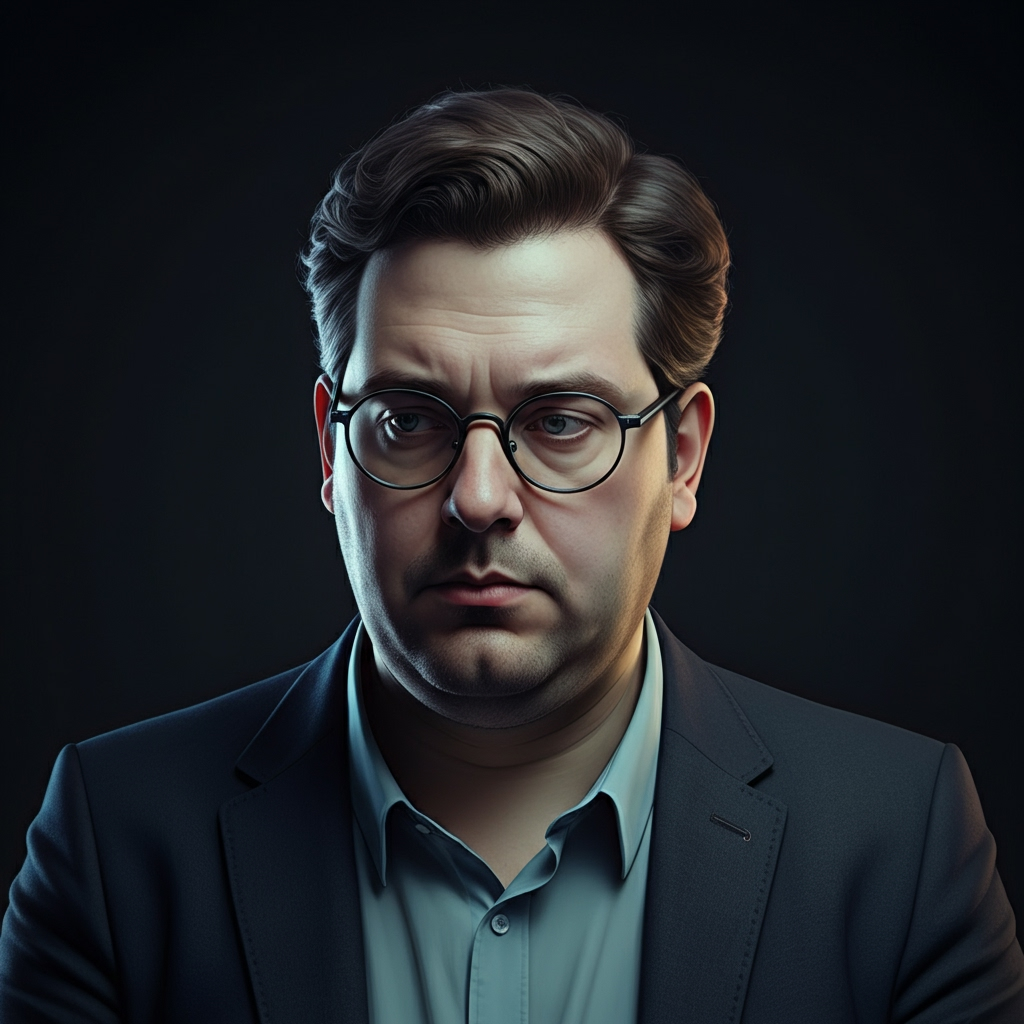 | Cyril Moreau | Cyril est un homme calme et observateur au début de la trentaine, avec une corpulence mince et une expression pensive. Il a les cheveux foncés soigneusement peignés et porte des lunettes. Il travaille comme comptable, connu pour son souci méticuleux du détail et son amour des puzzles. Il a l'habitude de tapoter ses doigts sur n'importe quelle surface lorsqu'il est nerveux. |
| 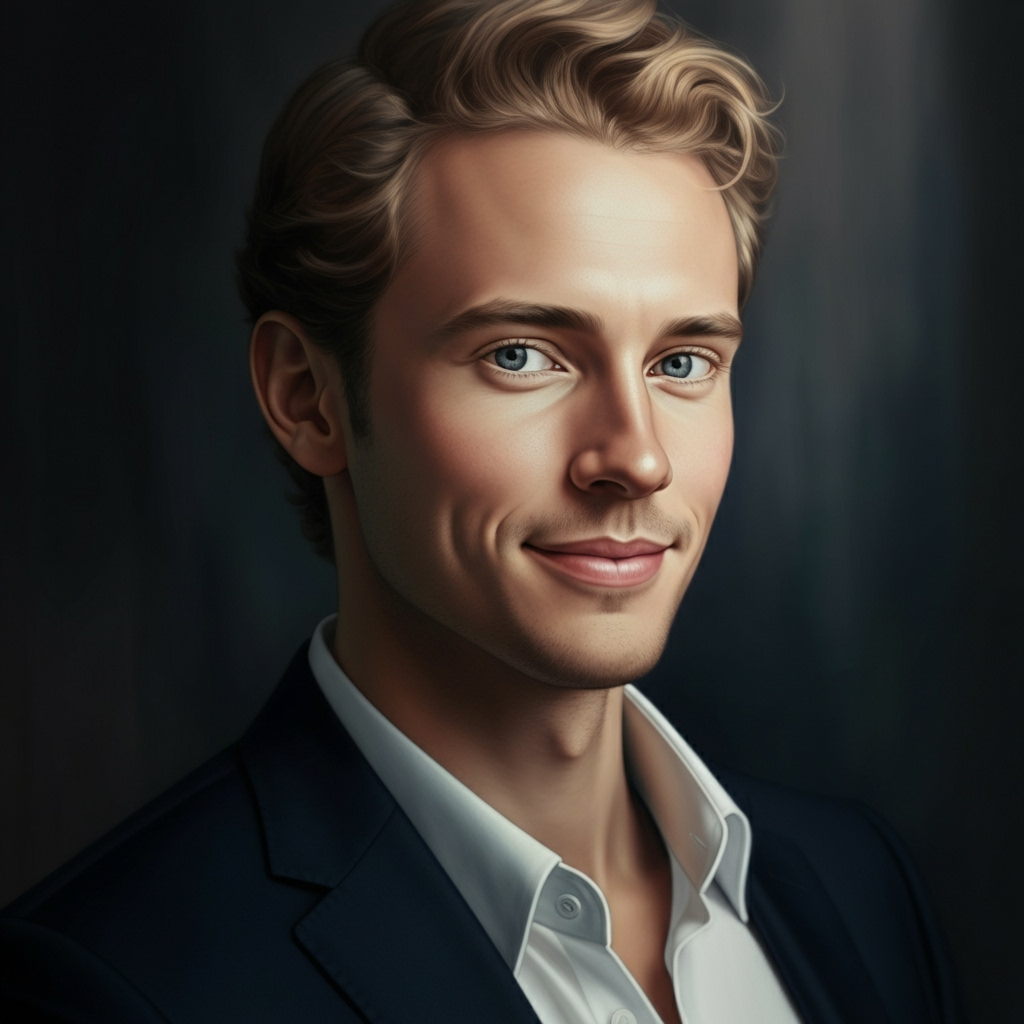 | Maxime Dubois | Maxime, au début de la trentaine, est un homme beau et sûr de lui avec un sourire charmant. Il a les cheveux blonds et des yeux bleus saisissants. C'est un entrepreneur prospère, connu pour sa nature compétitive et son amour du luxe. Il vérifie souvent son reflet sur toute surface réfléchissante. |
| 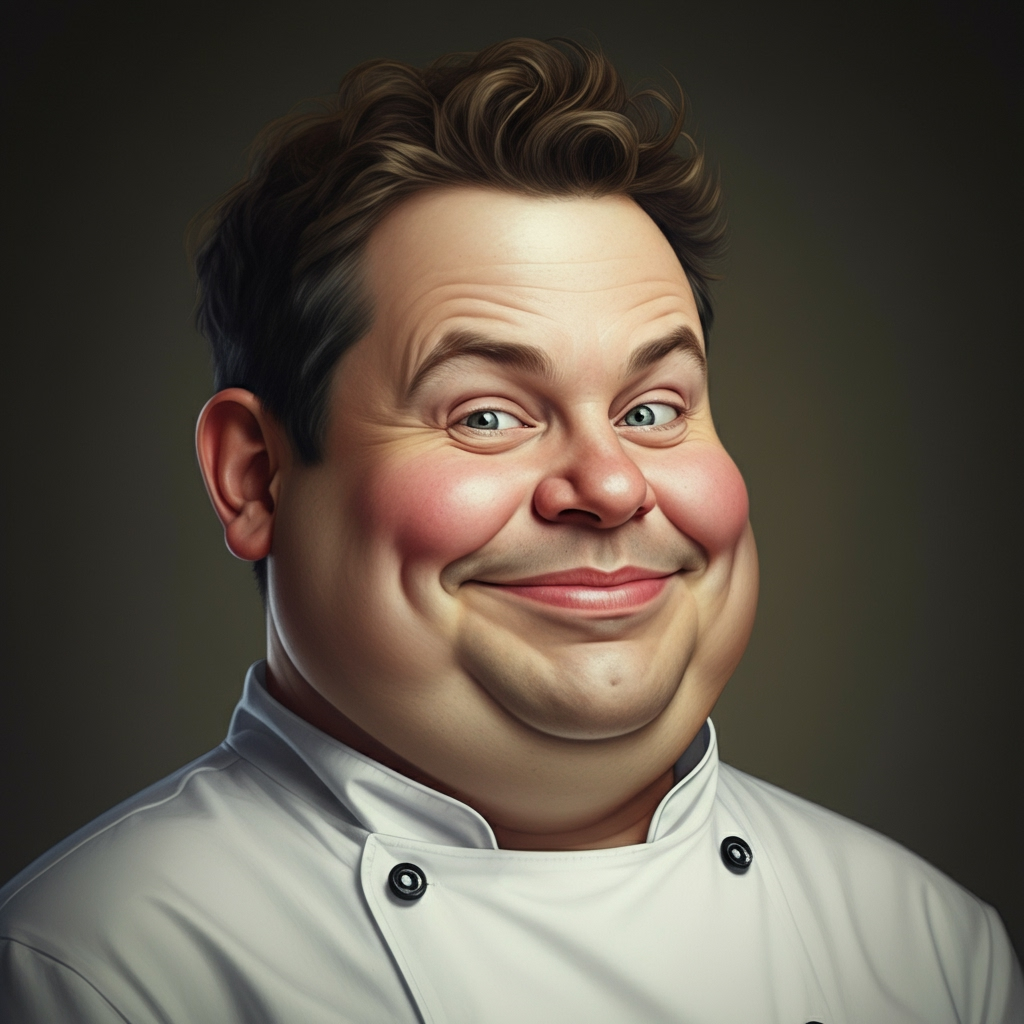 | Antoine Lefevre | Antoine est un homme jovial et extraverti au début de la trentaine, avec une corpulence trapue et un rire tonitruant. Il a le crâne rasé et une attitude amicale. C'est un chef cuisinier, connu pour son amour de la nourriture et sa personnalité décontractée. Il fait souvent des blagues pour détendre l'atmosphère. |
| 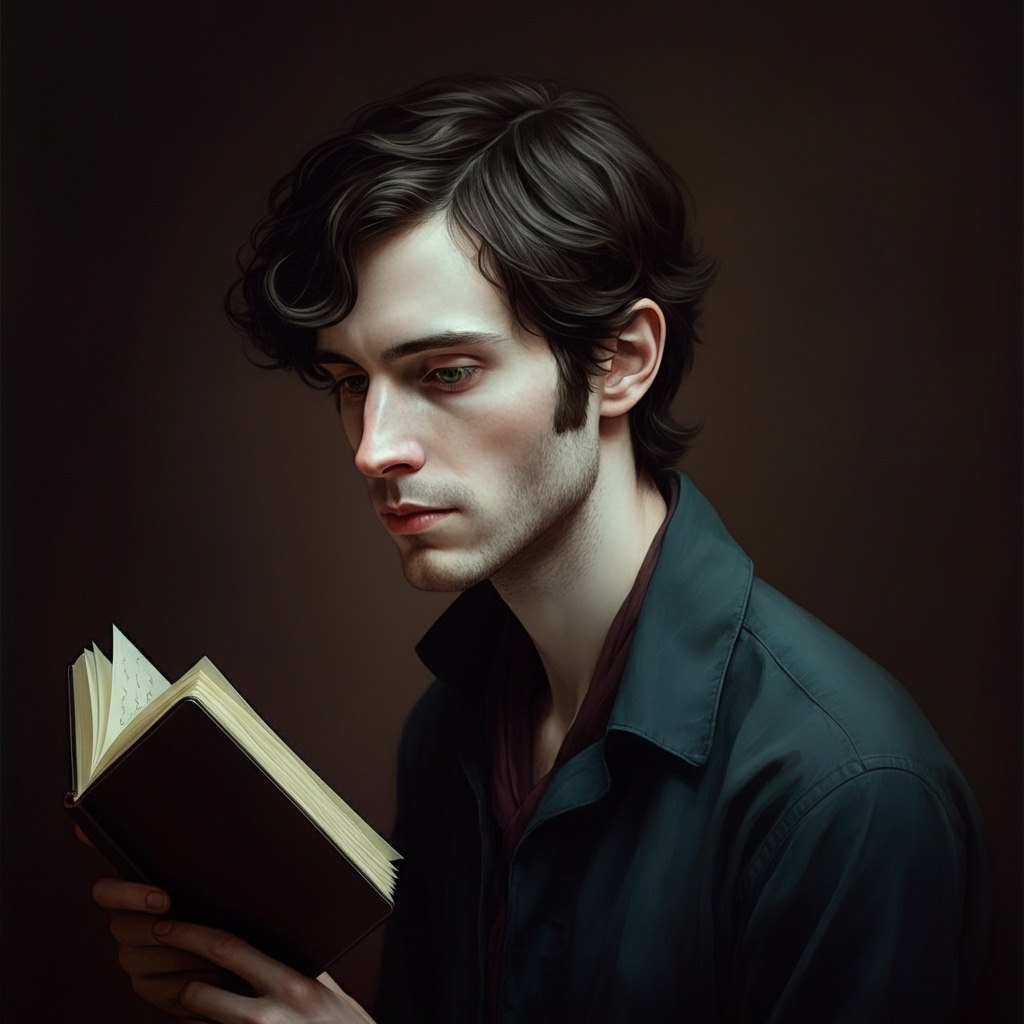 | Robin Clement | Robin est un homme calme et mystérieux au début de la trentaine, avec un physique mince et un regard perçant. Il a les cheveux foncés, mi-longs et semble souvent perdu dans ses pensées. C'est un écrivain, connu pour ses histoires sombres et mélancoliques. Il porte souvent un petit carnet, où il note ses pensées. |
| 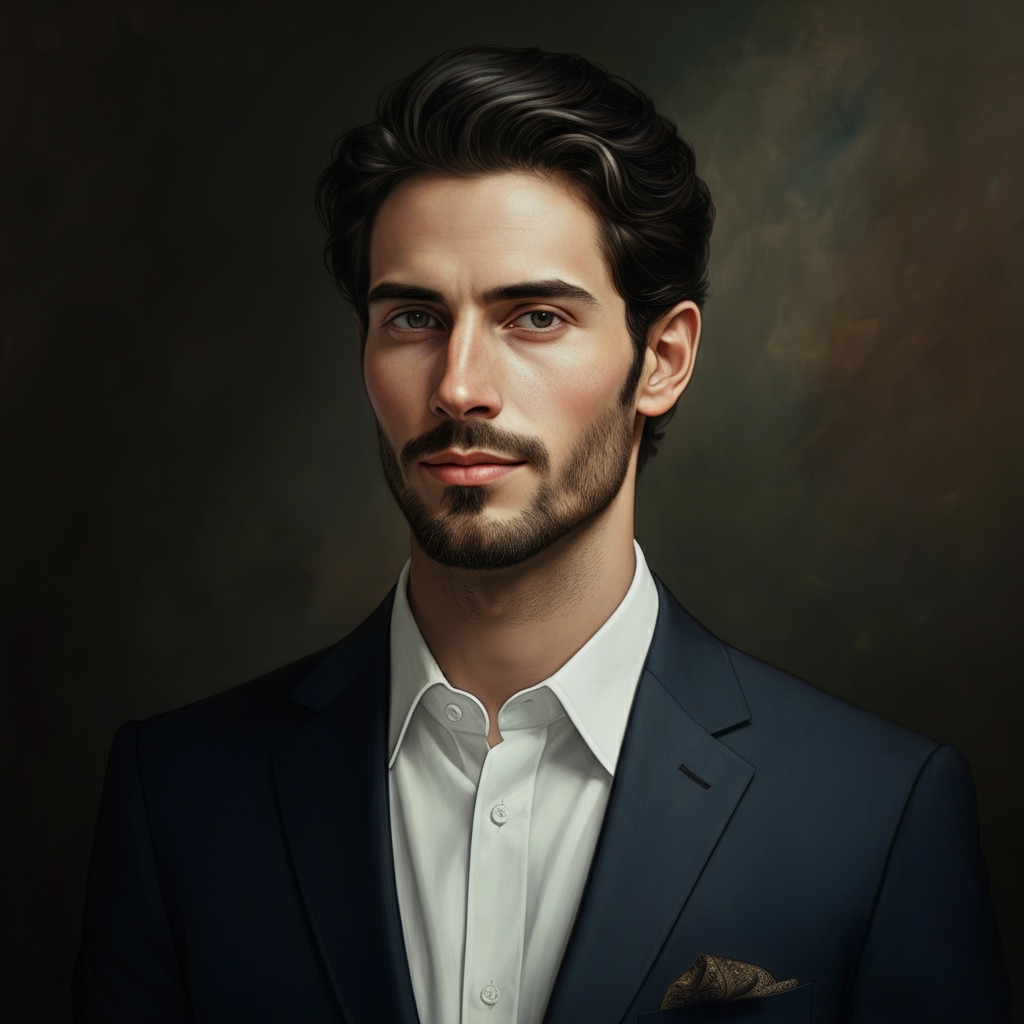 | Gabriel Marchand | Gabriel est un homme charmant et sophistiqué au début de la trentaine, avec une apparence soignée et une attitude confiante. Il a les cheveux bruns bien coiffés et une barbe bien entretenue. C'est un marchand d'art prospère, connu pour son goût raffiné et son amour des belles choses de la vie. Il porte souvent un parfum cher. |


In [123]:
display(Markdown(create_character_table(State["character_presentation"])))

### Final Book

In [124]:
prompt_character_guidebook =""" 
You are an expert mystery writer assistant, adept at crafting character-driven narratives. 
Your task is to generate a character-specific guidebook in Markdown format, 
providing a detailed perspective of the events leading up to the murder. 
This guidebook should be written from the first-person perspective of a given character, 
using all the known information (context, characters, timeline, red herrings, and clues) to provide a compelling narrative.

The output should be a single Markdown document, containing the following sections:

# [Character Name] - Guidebook

## Introduction

*   A brief introduction of the character, their background, and reason for being here.
*   Mention their relationship to {victim_name}.

## Character
### Goal
*  Defines a personal objective the character, that is not just solving the murder. 

## The Day of the Murder
### Chronology
*   A brief first-person account of the character's activities on the day of the murder, and ending after the discovery of the body.
*   Include details from the timeline using a list of - **[hour]**: event description, focusing on the character's interactions with others and their own actions.
*   Integrate red herrings and misleading events that they either witnessed or were part of.
*   Include details of any clues that they either discovered, had knowledge of, or made a contribution to.
*   How they perceived each other character, and their suspicions, and why.
*   Include inner monologues of their thoughts and feelings.
*   Provide any information that might be relevant or helpful to solve the mystery, from their point of view.
*   Try to make the character sympathetic and believable, without revealing any knowledge of the culprit if he is innocent.

### Alibi
*   Include their alibi, and how they perceived the events.

## Hidden Information:
*   Private Notes & actions: Character additional secret information that only they know. This could be a hidden motive, something they saw in secret, or a piece of evidence they've kept hidden. This information can either help solve the mistery or lead the others towards the wrong person

## Thoughts
*   The character's own thoughts based on their observations.
*   Explain which clues, or red herrings they focused on, and how they interpreted them.
*   Justify their assumptions, even if they are wrong.

## Specific knowledge
*   Specific knowledge the character has been able to acquire using it's ability.

## Conclusion
*   A final comment regarding their life, and the effect this situation had on them.

**Context:** {murder_context}

**Characters:** {characters}

**Scenario**: {scenario}

**Clues**: {clues}

**Timeline**: {timeline}

**Red herrings**: {red_herrings}

**For this generation, assume the character is [{current_character_name}]**
here are the details about this character: {current_character}

Ensure that the output is a valid Markdown document, without any leading or trailing text. 
Use the correct Markdown syntax, and make it very detailed.

"""

prompt_translation=""" 
Translate the following content in french while retaining the structure and the format, without any leading or trailing text

content to translate: {content}
"""

In [125]:
import markdown
from IPython.display import display, Markdown
from PIL import Image
import os
import io 

def generate_character_markdown(context, character_presentation, character_name, image_bytes, character_info, output_dir=SCENARIO_TITLE):
    """
    Generates a Markdown file for a character, including a miniature image.

    Args:
        context (str): The general context of the story.
        character_presentation (str): The presentation of all the characters.
        character_name (str): The name of the character (used for filename).
        image_path (str): Path to the character's image.
        character_info (str): Markdown formatted text with character details.
        output_dir (str):  Directory to store the generated .md files.
    """

    # 1. Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)


    try:
        img = Image.open(io.BytesIO(image_bytes))
        img.thumbnail((150, 150))
        miniature_image_path = os.path.join(output_dir, f"mini_{character_name.replace(' ', '_').replace("'", "")}.png") # Use character name for consistency.
        img.save(miniature_image_path)
        image_md = f"![{character_name}'s Miniature Image]({f"./mini_{character_name.replace(' ', '_').replace("'", "")}.png"})\n"
    except Exception as e: # Generic handling to catch all image processing errors.
        print(f"Error processing image: {e}")
        image_md = ""


    # 3. Create the full Markdown content with mini im²age and text
    markdown_text = f"""# {character_name}\n{image_md}\n# Contexte\n{context}\n# Suspects\n{character_presentation}\n{character_info}"""

    # 4. Save the markdown to a file
    output_file_path = os.path.join(output_dir, f"{character_name.replace(' ', '_')}.md") # replace space with _ for the filename
    try:
       with open(output_file_path, "w", encoding="utf-8") as f:
           f.write(markdown_text)
       print(f"Markdown file saved to: {output_file_path}")
    except Exception as e:
       print(f"Error saving file: {e}")


    # 5. (Optional) Display Markdown in Jupyter for visual verification
    # display(Markdown(markdown_text))

In [126]:
import time

for CHARACTER_INDEX in range(len(State["characters"])):
# for CHARACTER_INDEX in range(len(character)):

  current_character = State["characters"][CHARACTER_INDEX]
  print("="*10, current_character["name"], "="*10)

  response = client.models.generate_content(
      model=os.getenv("MODEL"),
      contents=prompt_character_guidebook.format(
          victim_name = State["victim_name"],
          murder_context = State["murder_context"],
          scenario=State["scenario"],
          characters=State["characters"],
          timeline = State["timeline"],
          red_herrings = State["red_herrings"],
          clues=State["clues"],
          current_character = current_character,
          current_character_name = current_character["name"]

      ),
      config=generate_content_config_txt
  )


  character_guidebook_en = response.text

  response = client.models.generate_content(
      model=os.getenv("MODEL"),
      contents=prompt_translation.format(
          content = character_guidebook_en
      ),
      config=generate_content_config_txt
  )

  character_guidebook_fr = response.text

  generate_character_markdown(
    context = State["introduction_fr"],
    character_name=State["character_presentation"][CHARACTER_INDEX]["name"],
    character_presentation=create_character_table(State["character_presentation"]),
    image_bytes=State["character_presentation"][CHARACTER_INDEX]["image_bytes"],
    character_info=character_guidebook_fr
  )

  print("Sleeping")
  time.sleep(30)



========== Quentin Dubois ==========
Markdown file saved to: murder_in_the_alps_express\Quentin_Dubois.md
Sleeping
========== Bastien Lemaire ==========
Markdown file saved to: murder_in_the_alps_express\Bastien_Lemaire.md
Sleeping
========== Cyril Moreau ==========
Markdown file saved to: murder_in_the_alps_express\Cyril_Moreau.md
Sleeping
========== Maxime Dubois ==========
Markdown file saved to: murder_in_the_alps_express\Maxime_Dubois.md
Sleeping
========== Antoine Lefevre ==========
Markdown file saved to: murder_in_the_alps_express\Antoine_Lefevre.md
Sleeping
========== Robin Clement ==========
Markdown file saved to: murder_in_the_alps_express\Robin_Clement.md
Sleeping
========== Gabriel Marchand ==========
Markdown file saved to: murder_in_the_alps_express\Gabriel_Marchand.md
Sleeping
